# Análise do [Dataset Student Depression](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data?select=Student+Depression+Dataset.csv)

Este notebook tem como objetivo demonstrar a criação de um projeto de Data Science, utilizando o dataset Student Depression para:
- Explorar e entender os dados;
- Realizar limpeza e transformações necessárias;
- Engajar engenharia de recursos simples;
- Treinar e avaliar modelos preditivos.

O Dataset Student Depression contém dados sobre a depressão entre estudantes de diferentes níveis de escolaridade.

In [1162]:
# Importando o pandas para manipulação e leitura dos dados
import pandas as pd

# Importando seaborn e matplotlib para criação de gráficos e visualizações
import seaborn as sns
import matplotlib.pyplot as plt

# Importando o statsmodels para modelagem estatística (ex.: regressão logística)
# e o módulo stepwise do pacote statstests para seleção de variáveis via procedimento stepwise
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statstests.process import stepwise

# Importando funções do scikit-learn para:
# - Métricas de avaliação (confusion matrix, accuracy, recall, etc.)
# - Divisão dos dados em conjuntos de treino e teste
# - Modelagem com árvores de decisão e visualização de árvores
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay,
                             recall_score, roc_curve, auc, roc_auc_score,
                             balanced_accuracy_score, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import chi2_contingency
from itertools import combinations

# Configurando o pandas para exibir todas as linhas do DataFrame durante a análise exploratória
pd.set_option("display.max_rows", None)

## Carregamento dos dados:

In [1163]:

dataset_path = '../data/Student Depression Dataset.csv'
df = pd.read_csv(dataset_path)
print(df.shape)
df.head()

(27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Exploração e Limpeza de Dados

In [1164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [1165]:
# Removendo a coluna id
df.drop(columns=['id'], inplace=True)

In [1166]:
# Renomeando as colunas
df.rename(columns={
    'Academic Pressure': 'AP',
    'Work Pressure': 'WP',
    'Study Satisfaction': 'SS',
    'Job Satisfaction': 'JS',
    'Sleep Duration': 'SD',
    'Dietary Habits': 'DH',
    'Have you ever had suicidal thoughts ?': 'ST',
    'Work/Study Hours': 'WSH',
    'Financial Stress': 'FS',
    'Family History of Mental Illness': 'FHMI'
}, inplace=True)

In [1167]:
# Validando valores nulos:
print(f'Valores null:\n{df.isnull().sum()}\n')
print(f'Valores nan:\n{df.isna().sum()}\n')

Valores null:
Gender        0
Age           0
City          0
Profession    0
AP            0
WP            0
CGPA          0
SS            0
JS            0
SD            0
DH            0
Degree        0
ST            0
WSH           0
FS            3
FHMI          0
Depression    0
dtype: int64

Valores nan:
Gender        0
Age           0
City          0
Profession    0
AP            0
WP            0
CGPA          0
SS            0
JS            0
SD            0
DH            0
Degree        0
ST            0
WSH           0
FS            3
FHMI          0
Depression    0
dtype: int64



In [1168]:
# Removendo os valores nulos
df.dropna(inplace=True)

In [1169]:
# Selecionando colunas por tipo
columns_object = df.select_dtypes(include=['object']).columns.tolist()
columns_numeric = df.select_dtypes(include=['number']).columns.tolist()

# Exibindo os nomes das colunas
print(f"Columns Object: {columns_object} qtd:{len(columns_object)}\n")
print(f"Columns Numeric: {columns_numeric} qtd:{len(columns_numeric)}")

Columns Object: ['Gender', 'City', 'Profession', 'SD', 'DH', 'Degree', 'ST', 'FHMI'] qtd:8

Columns Numeric: ['Age', 'AP', 'WP', 'CGPA', 'SS', 'JS', 'WSH', 'FS', 'Depression'] qtd:9


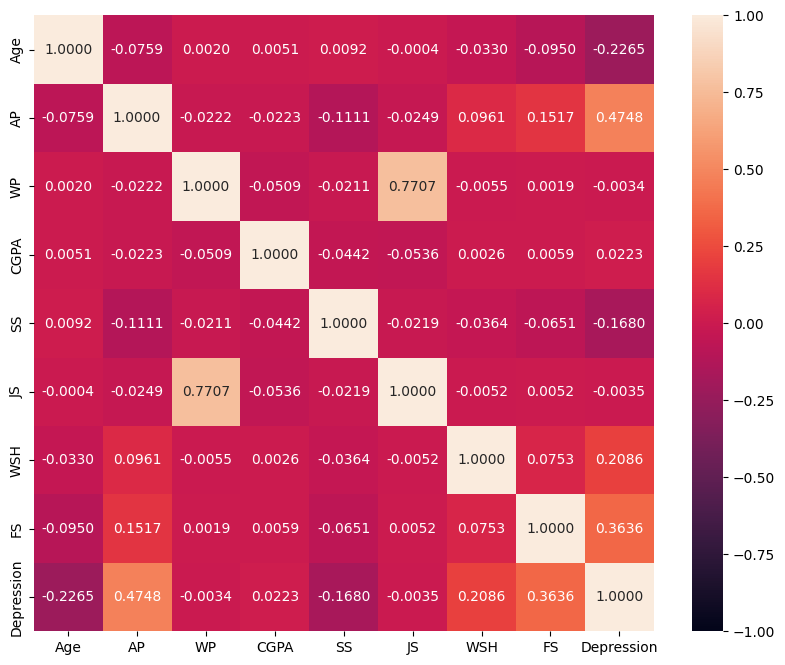

In [1170]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[columns_numeric].corr(), annot=True,
            fmt=".4f",  annot_kws={'size': 10}, vmin=-1, vmax=1)
plt.show()

In [1171]:
df1 = df.copy()

vif = pd.DataFrame()
vif['Feature'] = columns_numeric
vif['VIF'] = [variance_inflation_factor(
    df1[columns_numeric].values, i) for i in range(len(columns_numeric))]
vif

,Feature,VIF
0,Age,18.301233
1,AP,7.569262
2,WP,2.463266
3,CGPA,18.220941
4,SS,5.262520
5,JS,2.464025
6,WSH,4.771614
7,FS,6.311872
8,Depression,3.825147


In [1172]:
df1.drop(columns=['CGPA'], inplace=True)

In [1173]:
vif = pd.DataFrame()
columns_numeric = df1.select_dtypes(include=['number']).columns.tolist()
vif['Feature'] = columns_numeric
vif['VIF'] = [variance_inflation_factor(
    df1[columns_numeric].values, i) for i in range(len(columns_numeric))]
vif

,Feature,VIF
0,Age,11.257195
1,AP,7.446242
2,WP,2.462955
3,SS,5.061472
4,JS,2.463611
5,WSH,4.681677
6,FS,6.129310
7,Depression,3.800987


In [1174]:
df1.drop(columns=['Age'], inplace=True)

In [1175]:
vif = pd.DataFrame()
columns_numeric = df1.select_dtypes(include=['number']).columns.tolist()
vif['Feature'] = columns_numeric
vif['VIF'] = [variance_inflation_factor(
    df1[columns_numeric].values, i) for i in range(len(columns_numeric))]
vif

,Feature,VIF
0,AP,6.161946
1,WP,2.462776
2,SS,3.961432
3,JS,2.463466
4,WSH,4.163657
5,FS,5.336383
6,Depression,3.621928


In [1176]:
result = []
columns_object = df1.select_dtypes(include=['object']).columns.tolist()
for item in combinations(columns_object, 2):

    table = pd.crosstab(df1[item[0]], df1[item[1]])

    chi2, pvalor, dof, _ = chi2_contingency(table)

    if pvalor >= 0.05:
        result.append({
            'comparation': f'{item[0]} vs {item[1]}',
            'p_valor': round(pvalor, 4),
            'chi2': round(chi2, 2),
            'dof': dof,
        })

table_chi = pd.DataFrame(result)
table_chi.sort_values(by=['comparation','p_valor'],ascending=False)

,comparation,p_valor,chi2,dof
8,SD vs FHMI,0.2770,5.10,4
6,Profession vs ST,0.5475,11.76,13
4,Profession vs SD,0.9016,39.35,52
7,Profession vs FHMI,0.4423,13.07,13
5,Profession vs DH,0.9056,27.97,39
2,Gender vs ST,0.8374,0.04,1
1,Gender vs SD,0.2872,5.00,4
0,Gender vs Profession,0.2329,16.31,13
9,DH vs FHMI,0.2264,4.35,3
3,City vs Profession,1.0000,383.06,663


In [1177]:
df1['Profession'].value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [1178]:
df1.query('Profession == "Student"', inplace=True)
df1.drop(columns=['Profession'], inplace=True)

In [1179]:
result = []
columns_object = df1.select_dtypes(include=['object']).columns.tolist()
for item in combinations(columns_object, 2):

    table = pd.crosstab(df1[item[0]], df1[item[1]])

    chi2, pvalor, dof, _ = chi2_contingency(table)

    if pvalor >= 0.05:
        result.append({
            'comparation': f'{item[0]} vs {item[1]}',
            'p_valor': round(pvalor, 4),
            'chi2': round(chi2, 2),
            'dof': dof,
        })

table_chi = pd.DataFrame(result)
table_chi.sort_values(by=['comparation','p_valor'],ascending=False)

,comparation,p_valor,chi2,dof
2,SD vs FHMI,0.2633,5.24,4
1,Gender vs ST,0.8255,0.05,1
0,Gender vs SD,0.2803,5.07,4
3,DH vs FHMI,0.2350,4.26,3


## Normalização e transformação de dados.

In [1180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      27867 non-null  object 
 1   City        27867 non-null  object 
 2   AP          27867 non-null  float64
 3   WP          27867 non-null  float64
 4   SS          27867 non-null  float64
 5   JS          27867 non-null  float64
 6   SD          27867 non-null  object 
 7   DH          27867 non-null  object 
 8   Degree      27867 non-null  object 
 9   ST          27867 non-null  object 
 10  WSH         27867 non-null  float64
 11  FS          27867 non-null  float64
 12  FHMI        27867 non-null  object 
 13  Depression  27867 non-null  int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 3.2+ MB


In [1181]:
df1.head()

,Gender,City,AP,WP,SS,JS,SD,DH,Degree,ST,WSH,FS,FHMI,Depression
0,Male,Visakhapatnam,5.0,0.0,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,Bangalore,2.0,0.0,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,Srinagar,3.0,0.0,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,Varanasi,3.0,0.0,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,Jaipur,4.0,0.0,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Analisando as variáveis quantitativas

In [1182]:
# Função para verificar outliers
def check_outliers(df):
    Q1 = df.quantile(q=.25)
    Q3 = df.quantile(q=.75)

    IQR = Q3 - Q1  # Calculando o valor do intervalo interquartil
    limit_lower = Q1 - 1.5 * IQR
    limit_upper = Q3 + 1.5 * IQR

    outliers_upper = df[(df > limit_upper)].sort_values().values
    outliers_lower = df[(df < limit_lower)].sort_values().values

    print(f'🔼 outliers_upper: {outliers_upper}')
    print(f'🔽 outliers_lower: {outliers_lower}')

    plt.figure(figsize=(8, 8))
    sns.boxplot(df)
    plt.show()

    return limit_lower, limit_upper

In [1183]:
columns_numeric = df1.select_dtypes(include=['number']).columns.tolist()
columns_numeric.remove("Depression")
df1[columns_numeric].describe()

,AP,WP,SS,JS,WSH,FS
count,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000,27867.000000
mean,3.140740,0.000431,2.943697,0.000682,7.157534,3.139520
std,1.381637,0.044019,1.361183,0.044421,3.707136,1.437289
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000
50%,3.000000,0.000000,3.000000,0.000000,8.000000,3.000000
75%,4.000000,0.000000,4.000000,0.000000,10.000000,4.000000
max,5.000000,5.000000,5.000000,4.000000,12.000000,5.000000


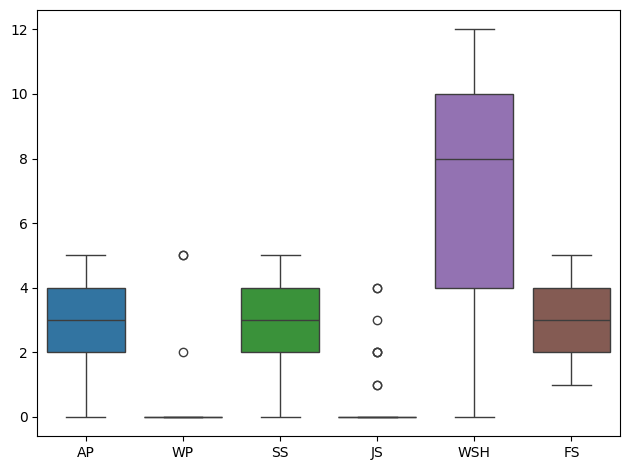

In [1184]:
sns.boxplot(df1[columns_numeric])
plt.tight_layout()
plt.show()

🔼 outliers_upper: [2. 5. 5.]
🔽 outliers_lower: []


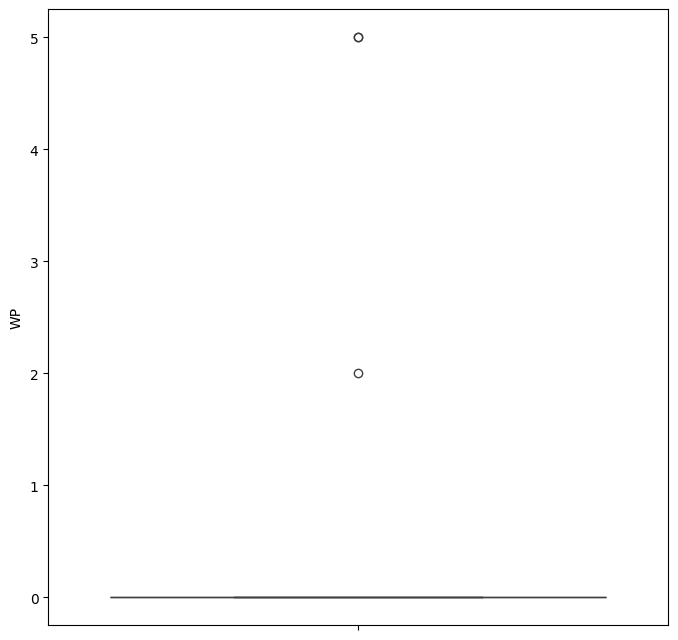

In [1185]:
limit_lower, limit_upper = check_outliers(df1['WP'])

In [1186]:
df1['WP'].value_counts()

WP
0.0    27864
5.0        2
2.0        1
Name: count, dtype: int64

In [1187]:
df1.query('WP == 0.0',inplace=True)
df1.drop(columns=['WP'], inplace=True)

🔼 outliers_upper: [1. 2. 2. 2. 3.]
🔽 outliers_lower: []


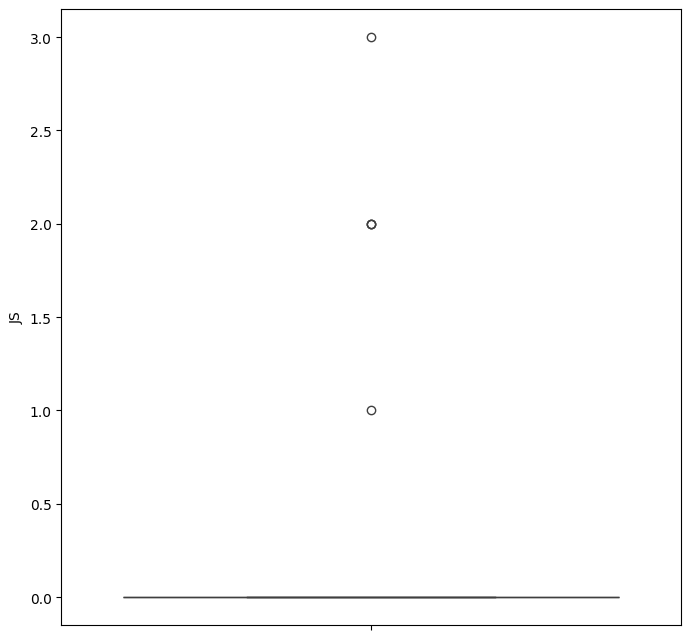

In [1188]:
limit_lower, limit_upper = check_outliers(df1['JS'])

In [1189]:
df1['JS'].value_counts()

JS
0.0    27859
2.0        3
3.0        1
1.0        1
Name: count, dtype: int64

In [1190]:
df1.query('JS == 0.0',inplace=True)
df1.drop(columns=['JS'], inplace=True)

### Analisando as variáveis qualitativas

In [1191]:
# Plotagem do grafico de torta
def pie_plot(data, labels, title):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [1192]:
columns_object = df1.select_dtypes(include=['object']).columns.tolist()
df1[columns_object].describe().T

,count,unique,top,freq
Gender,27859,2,Male,15522
City,27859,52,Kalyan,1564
SD,27859,5,Less than 5 hours,8299
DH,27859,4,Unhealthy,10306
Degree,27859,28,Class 12,6074
ST,27859,2,Yes,17626
FHMI,27859,2,No,14377


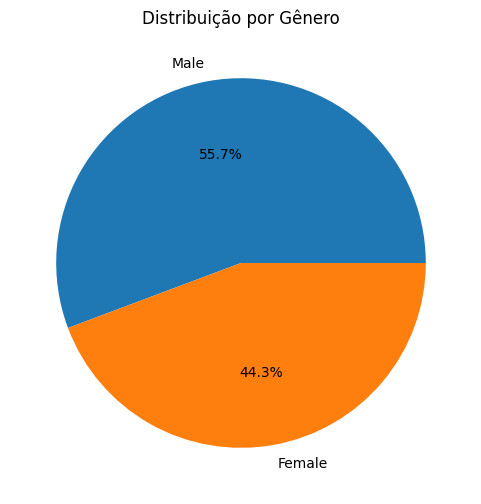

In [1193]:
# Plotagem para a variável Gender
gender_counts = df1['Gender'].value_counts()
pie_plot(data=gender_counts, labels=gender_counts.index,
         title='Distribuição por Gênero')

In [1194]:
# Convertendo a variavel para binaria
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1}).astype('int64')

In [1195]:
df1['City'].value_counts()

City
Kalyan                1564
Srinagar              1371
Hyderabad             1338
Vasai-Virar           1289
Lucknow               1154
Thane                 1139
Ludhiana              1109
Agra                  1092
Surat                 1078
Kolkata               1065
Jaipur                1034
Patna                 1006
Visakhapatnam          968
Pune                   968
Ahmedabad              947
Bhopal                 933
Chennai                883
Meerut                 821
Rajkot                 814
Delhi                  767
Bangalore              765
Ghaziabad              744
Mumbai                 698
Vadodara               693
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 607
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

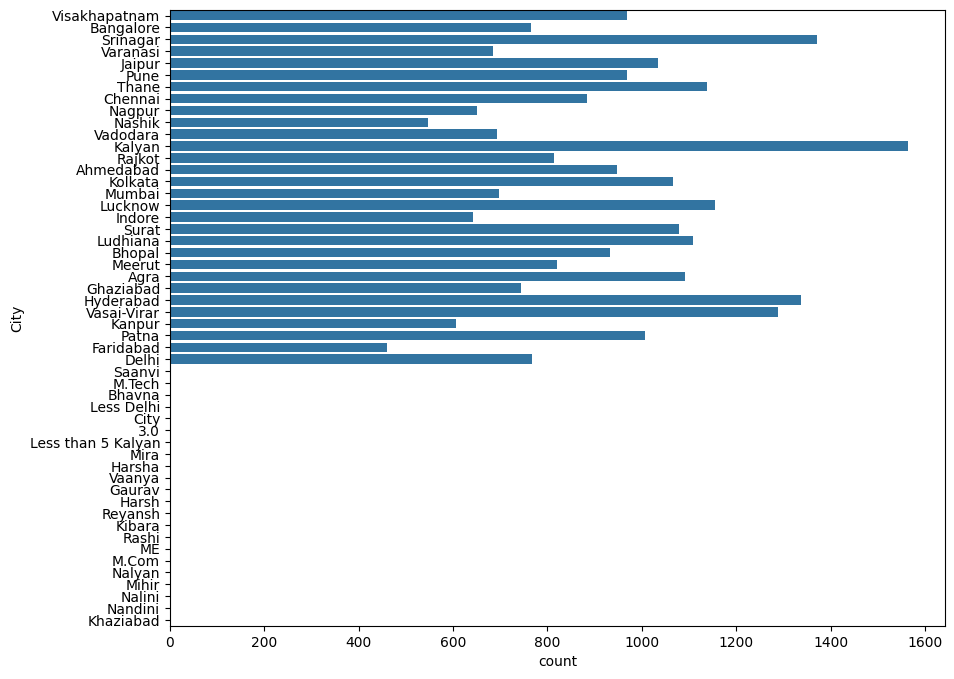

In [1196]:
plt.figure(figsize=(10,8))
sns.countplot(df1['City'])
plt.show()

In [1197]:
# Removendo as cidades com menos de 2 ocorrências
filtered_cities = df1['City'].value_counts()[lambda x: x > 2].index
print(filtered_cities)
df1.query('City in @filtered_cities', inplace=True)

Index(['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane',
       'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna',
       'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut',
       'Rajkot', 'Delhi', 'Bangalore', 'Ghaziabad', 'Mumbai', 'Vadodara',
       'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad'],
      dtype='object', name='City')


In [1198]:
# Plotando o grafico de torta para
df1['SD'].value_counts()

SD
Less than 5 hours    8292
7-8 hours            7324
5-6 hours            6168
More than 8 hours    6031
Others                 18
Name: count, dtype: int64

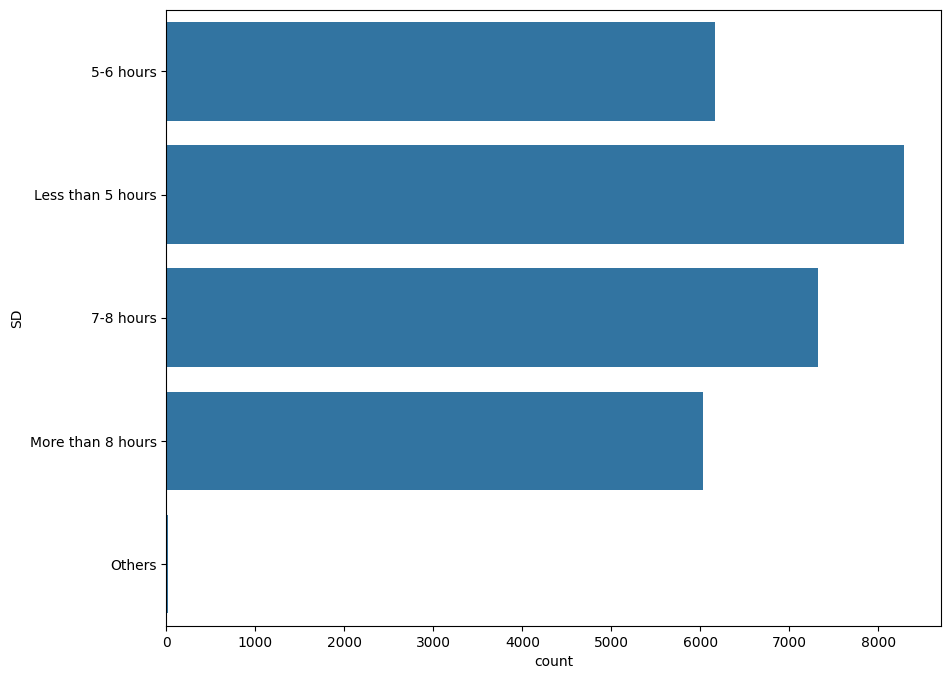

In [1199]:
plt.figure(figsize=(10,8))
sns.countplot(df1['SD'])
plt.show()

In [1200]:
df1.query('SD != "Others"', inplace=True)

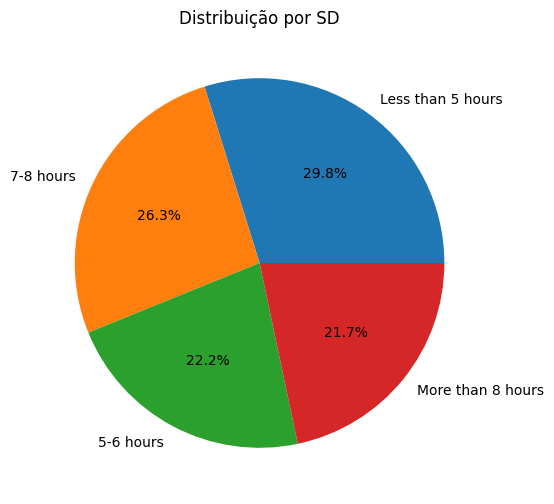

In [1201]:
# Plotagem para a variável SD
sd_counts = df1['SD'].value_counts()
pie_plot(data=sd_counts, labels=sd_counts.index,
         title='Distribuição por SD')

In [1202]:
mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

df1['SD'] = df1['SD'].map(mapping)

In [1203]:
df1['DH'].value_counts()

DH
Unhealthy    10285
Moderate      9892
Healthy       7626
Others          12
Name: count, dtype: int64

In [1204]:
df1.query('DH != "Others"', inplace=True)

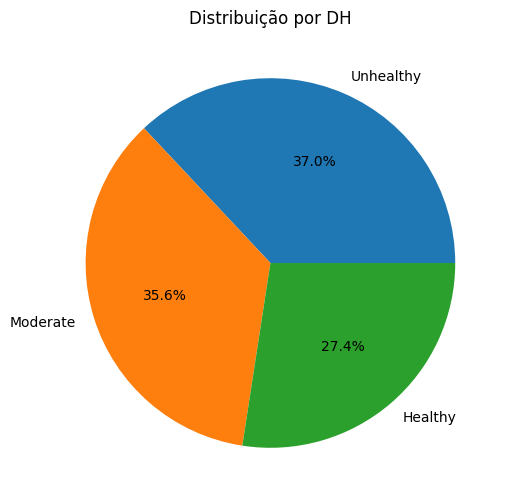

In [1205]:
# Plotagem para a variável DH
sh_counts = df1['DH'].value_counts()
pie_plot(data=sh_counts, labels=sh_counts.index,
         title='Distribuição por DH')

In [1206]:
mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}

df1['DH'] = df1['DH'].map(mapping)

In [1207]:
df1['Degree'].value_counts()

Degree
Class 12    6068
B.Ed        1858
B.Com       1503
B.Arch      1475
BCA         1428
MSc         1183
B.Tech      1151
MCA         1039
M.Tech      1019
BHM          921
BSc          883
M.Ed         817
B.Pharm      808
M.Com        733
BBA          695
MBBS         693
LLB          669
BE           608
BA           594
M.Pharm      579
MD           568
MBA          560
MA           542
PhD          518
LLM          480
MHM          191
ME           185
Others        35
Name: count, dtype: int64

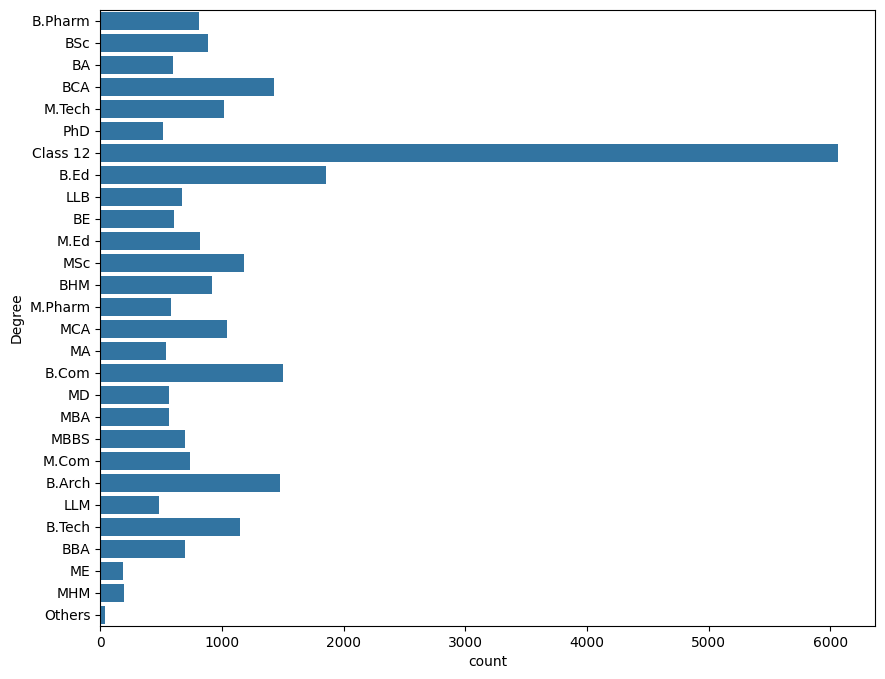

In [1208]:
plt.figure(figsize=(10,8))
sns.countplot(df1['Degree'])
plt.show()

In [1209]:
df1.query('Degree != "Others"',inplace=True)

In [1210]:
def categorize_education(degree):
    if degree == "Class 12":
        return 'Secondary Education'
    elif degree in ["PhD", "MSc", "MHM", "ME", "MD", "MCA", "MBBS", "MBA", "MA",
                    "M.Tech", "M.Pharm", "M.Ed", "M.Com", "LLM"]:
        return 'Postgraduate Degree'
    elif degree in ["LLB", "BSc", "BHM", "BE", "BCA", "BBA", "BA", "B.Tech",
                    "B.Pharm", "B.Ed", "B.Com", "B.Arch"]:
        return 'Undergraduate Degree'


df1["Degree"] = df1["Degree"].apply(categorize_education).astype('category')

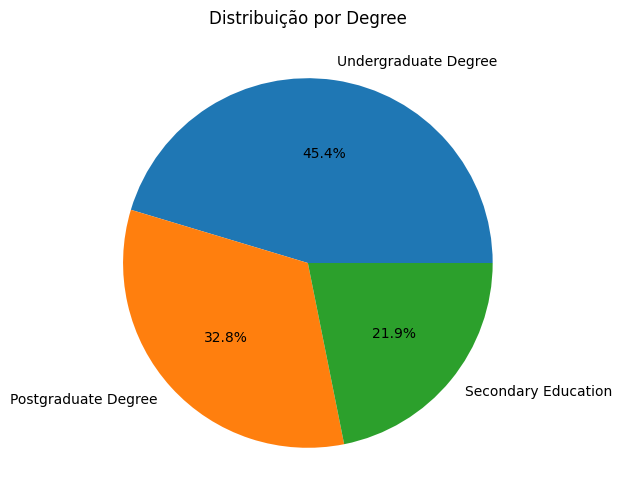

In [1211]:
degree_counts = df1['Degree'].value_counts()
pie_plot(data=degree_counts, labels=degree_counts.index, title='Distribuição por Degree')

In [1212]:
df1['ST'].value_counts()

ST
Yes    17569
No     10199
Name: count, dtype: int64

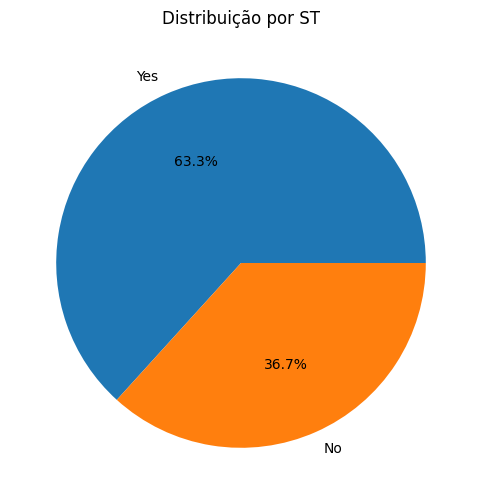

In [1213]:
st_counts = df1['ST'].value_counts()
pie_plot(data=st_counts, labels=st_counts.index, title='Distribuição por ST')

In [1214]:
df1['ST'] = df1['ST'].map({'No': 0, 'Yes': 1}).astype('int64')

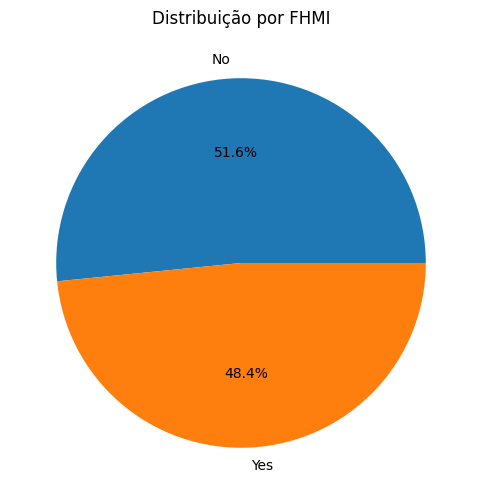

In [1215]:
fhmi_counts = df1['FHMI'].value_counts()
pie_plot(data=fhmi_counts, labels=fhmi_counts.index, title='Distribuição por FHMI')

In [1216]:
df1['FHMI'] = df1['FHMI'].map({'No': 0, 'Yes': 1}).astype('int64')

## Modelagem e Treinamento

In [1217]:
df1.head(10)

,Gender,City,AP,SS,SD,DH,Degree,ST,WSH,FS,FHMI,Depression
0,1,Visakhapatnam,5.0,2.0,2,3,Undergraduate Degree,1,3.0,1.0,0,1
1,0,Bangalore,2.0,5.0,2,2,Undergraduate Degree,0,3.0,2.0,1,0
2,1,Srinagar,3.0,5.0,1,3,Undergraduate Degree,0,9.0,1.0,1,0
3,0,Varanasi,3.0,2.0,3,2,Undergraduate Degree,1,4.0,5.0,1,1
4,0,Jaipur,4.0,3.0,2,2,Postgraduate Degree,1,1.0,1.0,0,0
5,1,Pune,2.0,3.0,1,3,Postgraduate Degree,0,4.0,1.0,0,0
6,1,Thane,3.0,4.0,3,3,Undergraduate Degree,0,1.0,2.0,0,0
7,0,Chennai,2.0,4.0,1,1,Secondary Education,0,0.0,1.0,1,0
8,1,Nagpur,3.0,1.0,3,2,Undergraduate Degree,1,12.0,3.0,0,1
9,1,Nashik,2.0,3.0,1,2,Undergraduate Degree,1,2.0,5.0,0,1


In [1219]:
df1.shape

(27768, 12)

## Modelo Logisitico

### Gerando formula para o modelo

In [ ]:
df_dummies.columns = df_dummies.columns.str.replace('-', '_', regex=True)

list_colums_dummies = list(df_dummies.drop(columns=['Depression']).columns)
formula_dummies_model = ' + '.join(list_colums_dummies)
formula_dummies_model = 'Depression ~ ' + formula_dummies_model
formula_dummies_model

'Depression ~ Gender + Age + City + AP + CGPA + SS + SD + DH + Degree + ST + WSH + FS + FHMI'

### Realizando o treino do modelo:

In [46]:
model = sm.Logit.from_formula(formula_dummies_model, df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.347886
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27816
Model:                          Logit   Df Residuals:                    27772
Method:                           MLE   Df Model:                           43
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.4872
Time:                        17:26:02   Log-Likelihood:                -9676.8
converged:                       True   LL-Null:                       -18869.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.5299      0.196    -17.990      0.000      -3.914      -3.145
City[T.Ahmedabad]         0.5725      0.134      4.271      0.000       0.310       0.835
City[T.Bangalore]         0.3417      0.142      2.408      0.016       0.064       0.620
City[T.Bhopal]            0.4178      0.132      3.159      0.002       0.159       0.677
City[T.Chennai]           0.1738      0.135      1.285      0.199      -0.091       0.439
City[T.Delhi]             0.3539      0.142      2.498      0.012       0.076       0.632
City[T.Faridabad]         0.4158      0.165      2.516      0.012       0.092       0.740
City[T.Ghaziabad]         0.3018      0.144      2.096      0.036       0.020       0.584
City[T.Hyderabad]         0.5476      0.122      4.477      0.000       0.308       0.787
City[T.Indore]            0.2918      0.148      1.977      0.048       0.003       0.581
City[T.Jaipur]            0.0211      0.129      0.164      0.870      -0.231       0.273
City[T.Kalyan]            0.3464      0.119      2.922      0.003       0.114       0.579
City[T.Kanpur]            0.2877      0.150      1.917      0.055      -0.006       0.582
City[T.Kolkata]           0.4710      0.132      3.575      0.000       0.213       0.729
City[T.Lucknow]           0.1758      0.127      1.388      0.165      -0.072       0.424
City[T.Ludhiana]          0.3295      0.128      2.578      0.010       0.079       0.580
City[T.Meerut]            0.4488      0.139      3.230      0.001       0.177       0.721
City[T.Mumbai]           -0.0213      0.145     -0.147      0.883      -0.306       0.263
City[T.Nagpur]           -0.0653      0.146     -0.447      0.655      -0.352       0.221
City[T.Nashik]            0.3321      0.155      2.144      0.032       0.029       0.636
City[T.Patna]             0.4829      0.130      3.708      0.000       0.228       0.738
City[T.Pune]              0.1812      0.131      1.382      0.167      -0.076       0.438
City[T.Rajkot]            0.3320      0.137      2.418      0.016       0.063       0.601
City[T.Srinagar]          0.2182      0.120      1.820      0.069      -0.017       0.453
City[T.Surat]             0.2817      0.131      2.156      0.031       0.026       0.538
City[T.Thane]             0.3705      0.127      2.914      0.004       0.121       0.620
City[T.Vadodara]          0.2314      0.143      1.616      0.106      -0.049       0.512
City[T.Varanasi]          0.0597      0.148      0.404      0.686      -0.230       0.349
City[T.Vasai-Virar]       0.2453      0.123      1.990      0.047       0.004       0.487
City[T.Visakhapatnam]     0.3109      0.133      2.346      0.019       0.051       0.571
DH[T.Moderate]            0.4731      0.045     10.435      0.000       0.384       0.562
DH[T.Unhealthy]           1.0958      0.047     23.563      0.000       1.005       1.187
Degree[T.1]               0.1778      0.064      2.775      0.006       0.052       0.303
D

### Executando o processo de stepwise para remoção de variaveis.

In [47]:
stepwise_model = stepwise(model, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Depression ~ Q('City[T.Ahmedabad]') + Q('City[T.Bangalore]') + Q('City[T.Bhopal]') + Q('City[T.Chennai]') + Q('City[T.Delhi]') + Q('City[T.Faridabad]') + Q('City[T.Ghaziabad]') + Q('City[T.Hyderabad]') + Q('City[T.Indore]') + Q('City[T.Jaipur]') + Q('City[T.Kalyan]') + Q('City[T.Kanpur]') + Q('City[T.Kolkata]') + Q('City[T.Lucknow]') + Q('City[T.Ludhiana]') + Q('City[T.Meerut]') + Q('City[T.Mumbai]') + Q('City[T.Nagpur]') + Q('City[T.Nashik]') + Q('City[T.Patna]') + Q('City[T.Pune]') + Q('City[T.Rajkot]') + Q('City[T.Srinagar]') + Q('City[T.Surat]') + Q('City[T.Thane]') + Q('City[T.Vadodara]') + Q('City[T.Varanasi]') + Q('City[T.Vasai-Virar]') + Q('City[T.Visakhapatnam]') + Q('DH[T.Moderate]') + Q('DH[T.Unhealthy]') + Q('Degree[T.1]') + Q('Degree[T.2]') + Q('Gender') + Q('Age') + Q('AP') + Q('CGPA') + Q('SS') + Q('SD') + Q('ST') + Q('WSH') + Q('FS') + Q('FHMI')
Optimization terminated successfully.
         Current function value: 0.34788

In [48]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                27816
Model:                          Logit   Df Residuals:                    27798
Method:                           MLE   Df Model:                           17
Date:                Tue, 11 Feb 2025   Pseudo R-squ.:                  0.4859
Time:                        17:26:21   Log-Likelihood:                -9700.1
converged:                       True   LL-Null:                       -18869.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.2855      0.175    -18.825      0.000      -3.628      -2.943
Q('City[T.Ahmedabad]')     0.3273      0.102      3.201      0.001       0.127       0.528
Q('City[T.Hyderabad]')     0.3023      0.086      3.498      0.000       0.133       0.472
Q('City[T.Kolkata]')       0.2246      0.099      2.265      0.024       0.030       0.419
Q('City[T.Patna]')         0.2376      0.097      2.444      0.015       0.047       0.428
Q('DH[T.Moderate]')        0.4737      0.045     10.488      0.000       0.385       0.562
Q('DH[T.Unhealthy]')       1.0911      0.046     23.602      0.000       1.000       1.182
Q('Degree[T.1]')           0.1739      0.064      2.737      0.006       0.049       0.299
Q('Degree[T.2]')           0.1504      0.059      2.562      0.010       0.035       0.265
Q('Age')                  -0.1180      0.005    -24.408      0.000      -0.127      -0.109
Q('AP')                    0.8397      0.015     56.296      0.000       0.811       0.869
Q('CGPA')                  0.0569      0.012      4.568      0.000       0.032       0.081
Q('SS')                   -0.2420      0.014    -17.787      0.000      -0.269      -0.215
Q('SD')                   -0.1883      0.016    -11.547      0.000      -0.220      -0.156
Q('ST')                    2.5142      0.039     64.241      0.000       2.437       2.591
Q('WSH')                   0.1168      0.005     23.474      0.000       0.107       0.127
Q('FS')                    0.5520      0.013     41.347      0.000       0.526       0.578
Q('FHMI')                  0.2455      0.036      6.733      0.000       0.174       0.317
==========================================================================================
"""

### Analisando os resultados do modelo

In [49]:
def confusion_matrix_plot(predicts, observated, cutoff):

    values = predicts.values

    binary_prediction = []

    for item in values:
        if item < cutoff:
            binary_prediction.append(0)
        else:
            binary_prediction.append(1)

    cm = confusion_matrix(binary_prediction, observated)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()

    sensitivity = recall_score(observated, binary_prediction, pos_label=1)
    specificity = recall_score(observated, binary_prediction, pos_label=0)
    accuracy = accuracy_score(observated, binary_prediction)

    indicators = pd.DataFrame({'Sensitividade': [sensitivity],
                               'Especificidade': [specificity],
                               'Acurácia': [accuracy]})
    return indicators

In [ ]:
df_dummies['phat'] = stepwise_model.predict()

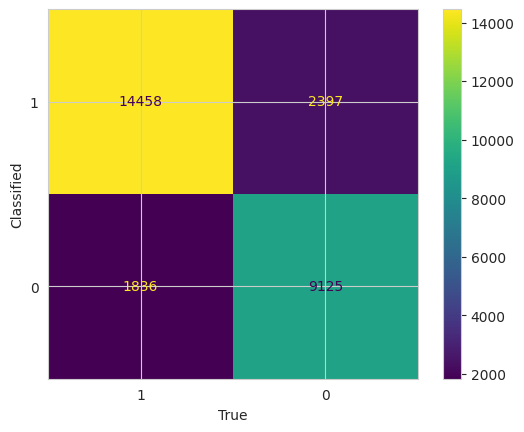

,Sensitividade,Especificidade,Acurácia
0,0.88732,0.791963,0.847821


In [ ]:
confusion_matrix_plot(observated=df_dummies['Depression'],
                      predicts=df_dummies['phat'],
                      cutoff=0.5)

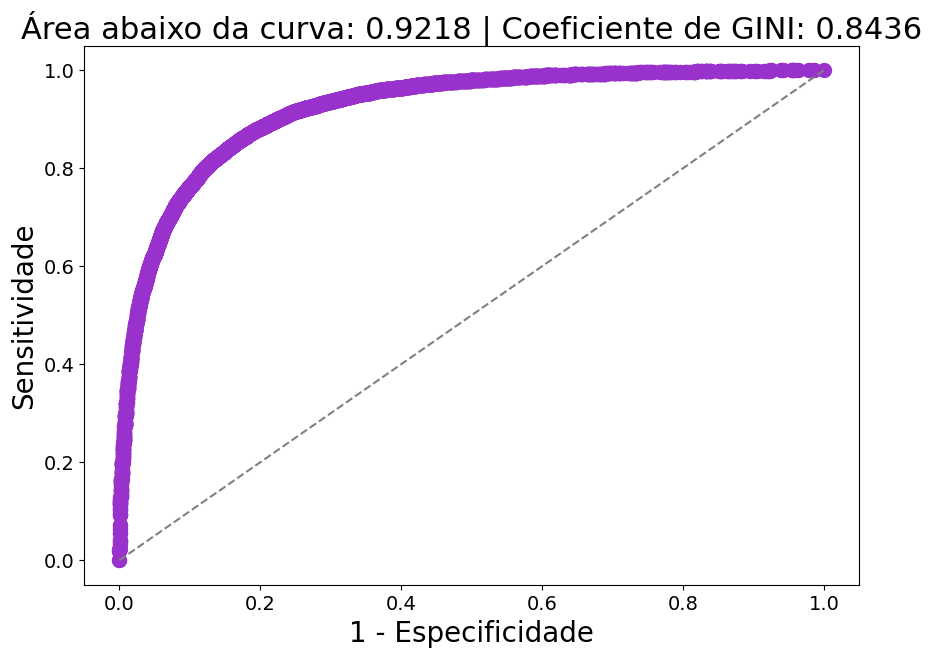

In [ ]:
fpr, tpr, thresholds = roc_curve(df_dummies['Depression'],
                                 df_dummies['phat'])
roc_auc = auc(fpr, tpr)

gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

## Árvore de Decisão

### Separando as variasveis preditoras da target

In [ ]:
X = df_dummies.drop(columns=['Depression', 'phat'])
y = df_dummies['Depression']

### Realizando a divisão do dataframe em teste e treino

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [156]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(20832, 41)

(20832,)

(6944, 41)

(6944,)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=3,
                             random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
pred = clf.predict(X_test)

y_prob = clf.predict_proba(X_test)[:, -1]

ac = accuracy_score(y_test, pred)
bac = balanced_accuracy_score(y_test, pred)
print(f'accuracy_score: {ac:.1%}')
print(f'balanced_accuracy_score: {bac:.1%}')

# Calculando AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_score:.2%}")
print(f"GINI: {(2*auc_score-1):.2%}")


print('\n', classification_report(y_test, pred))

accuracy_score: 82.3%
balanced_accuracy_score: 80.9%
AUC-ROC: 87.34%
GINI: 74.67%

               precision    recall  f1-score   support

           0       0.83      0.72      0.77      2896
           1       0.82      0.90      0.85      4048

    accuracy                           0.82      6944
   macro avg       0.82      0.81      0.81      6944
weighted avg       0.82      0.82      0.82      6944



[Text(0.5, 0.875, 'x[8] <= 0.5\ngini = 0.485\nsamples = 20832\nvalue = [8607, 12225]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.355\nsamples = 7606\nvalue = [5849, 1757]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 3.5\ngini = 0.224\nsamples = 5522\nvalue = [4814, 708]'),
 Text(0.0625, 0.125, 'gini = 0.144\nsamples = 3874\nvalue = [3572, 302]'),
 Text(0.1875, 0.125, 'gini = 0.371\nsamples = 1648\nvalue = [1242, 406]'),
 Text(0.375, 0.375, 'x[10] <= 2.5\ngini = 0.5\nsamples = 2084\nvalue = [1035, 1049]'),
 Text(0.3125, 0.125, 'gini = 0.44\nsamples = 880\nvalue = [593, 287]'),
 Text(0.4375, 0.125, 'gini = 0.465\nsamples = 1204\nvalue = [442, 762]'),
 Text(0.75, 0.625, 'x[2] <= 2.5\ngini = 0.33\nsamples = 13226\nvalue = [2758, 10468]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[10] <= 2.5\ngini = 0.5\nsamples = 3110\nvalue = [1534, 1576]'),
 Text(0.5625, 0.125, 'gini = 0.409\nsamples = 1135\nvalue = [810, 325]'),
 Text(0.6875, 0.125, 'gini = 0.464\nsamples 

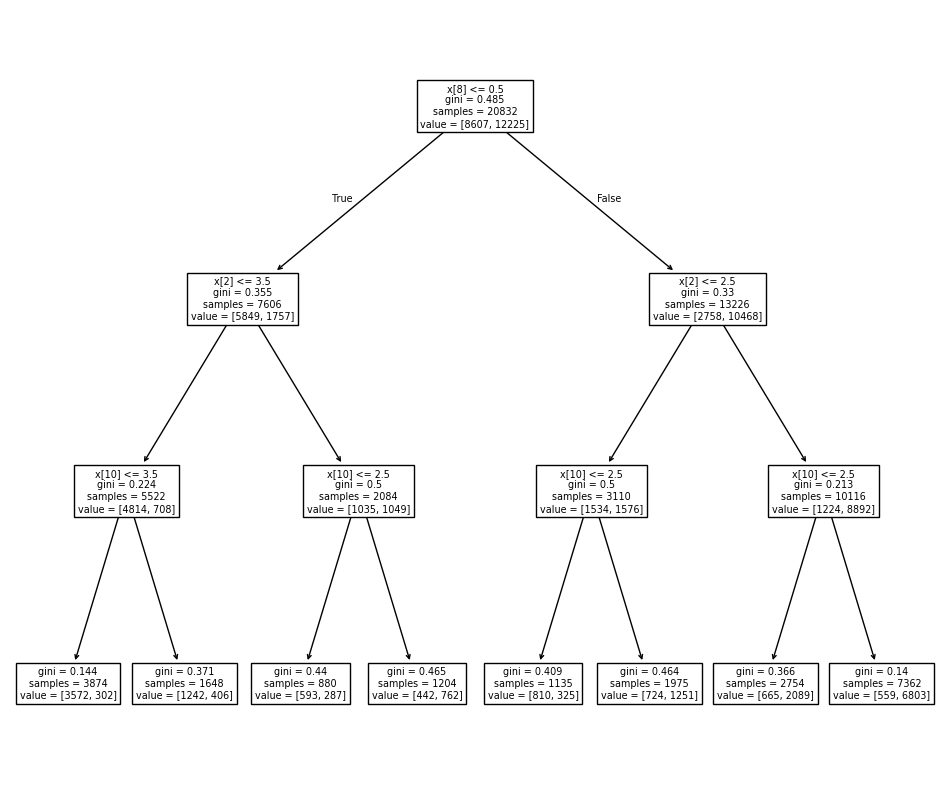

In [159]:
plt.figure(figsize=(12, 10))
plot_tree(clf)